In [98]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [265]:
# some const
a = 2.03*10**(-4)
c = 0.093

# some predetermined para
v_bar = 20
tMax = 10000
tDelta = 0.001
sigma = 0.05

# coeff for controller
k1 = 1.5
k2 = 0.8


In [266]:
# generate reference trajectory
x_bar = [v_bar*t*tDelta for t in range(tMax)]
T = [t*tDelta for t in range(tMax)]

In [267]:
# policy 1
def policy1 (x_err, v_err):
    return k1*x_err+k1*v_err+a*v_bar**2+c
# policy 2
def policy2 (x_err, v_err):
    return a*v_err**2+k1*x_err+k1*v_err+a*v_bar**2+c

In [268]:
# generate trajectory for policy 1
accel1 = [0 for t in range(tMax)]
x1 = [0 for t in range(tMax)]
v1 = [0 for t in range(tMax)]
for t in range(tMax-1):
    accel1[t] = -a*v1[t]**2+policy1((x_bar[t]-x1[t]), (v_bar-v1[t]))-c
    v1[t+1] = v1[t]+accel1[t]*tDelta+random.gauss(0,sigma)
    x1[t+1] = x1[t]+v1[t]*tDelta
    
# generate trajectory for policy 2
accel2 = [0 for t in range(tMax)]
x2 = [0 for t in range(tMax)]
v2 = [0 for t in range(tMax)]
for t in range(tMax-1):
    accel2[t] = -a*v2[t]**2+policy2((x_bar[t]-x2[t]), (v_bar-v2[t]))-c
    v2[t+1] = v2[t]+accel2[t]*tDelta+random.gauss(0,sigma)
    x2[t+1] = x2[t]+v2[t]*tDelta  

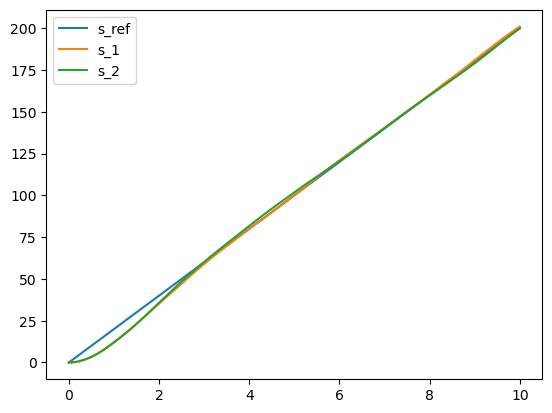

In [269]:
plt.plot(T, x_bar)
plt.plot(T,x1)
plt.plot(T,x2)
plt.legend(["s_ref", "s_1","s_2"])

In [270]:
# regenerate trajectory for policy 1 with no noise
accel1 = [0 for t in range(tMax)]
x1 = [0 for t in range(tMax)]
v1 = [0 for t in range(tMax)]
for t in range(tMax-1):
    accel1[t] = -a*v1[t]**2+policy1((x_bar[t]-x1[t]), (v_bar-v1[t]))-c
    v1[t+1] = v1[t]+accel1[t]*tDelta
    x1[t+1] = x1[t]+v1[t]*tDelta
    
# generate trajectory for policy 2 with no noise
accel2 = [0 for t in range(tMax)]
x2 = [0 for t in range(tMax)]
v2 = [0 for t in range(tMax)]
for t in range(tMax-1):
    accel2[t] = -a*v2[t]**2+policy2((x_bar[t]-x2[t]), (v_bar-v2[t]))-c
    v2[t+1] = v2[t]+accel2[t]*tDelta
    x2[t+1] = x2[t]+v2[t]*tDelta  
x1 = np.array(x1)
x2 = np.array(x2)
x_bar = np.array(x_bar)

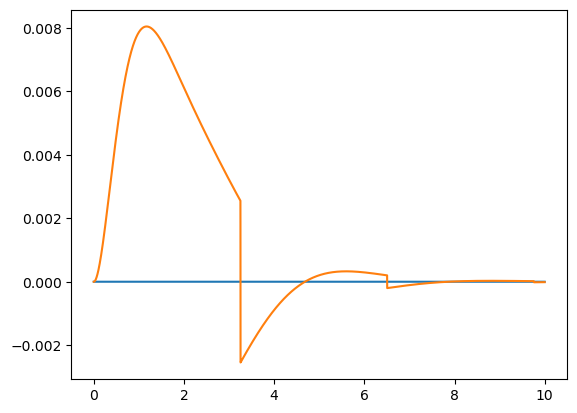

In [271]:
# for policy evaluation
plt.plot(T, [0 for t in range(tMax)])
plt.plot(T, np.absolute(x_bar-x1)-np.absolute(x_bar-x2))

In [274]:
np.sum(np.absolute(x_bar-x1))/np.sum(np.absolute(x_bar-x2))

1.0010031571576983